In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['emnist-letters-mapping.txt', 'emnist-letters-test.csv', 'emnist-mnist-mapping.txt', 'emnist-digits-train.csv', 'emnist-bymerge-mapping.txt', 'emnist-balanced-train.csv', 'emnist-digits-test.csv', 'emnist-balanced-test.csv', 'emnist-mnist-test.csv', 'emnist-letters-train.csv', 'emnist-byclass-train.csv', 'emnist-bymerge-test.csv', 'emnist-balanced-mapping.txt', 'emnist-mnist-train.csv', 'emnist-digits-mapping.txt', 'emnist-bymerge-train.csv', 'emnist-byclass-test.csv', 'emnist_source_files', 'emnist-byclass-mapping.txt']


In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import SGD,RMSprop,Adam,Nadam,Adamax,Adadelta,Adagrad
from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU 

Using TensorFlow backend.


In [3]:
bala_train = pd.read_csv("../input/emnist-balanced-train.csv")

train, val = train_test_split(bala_train, test_size=0.1) # change this split however you want

num_classes = 47

X_train, Y_train = train.values[:,1:] , train.values[:,0]
#X_train[0].shape
X_val, Y_val = val.values[:,1:], val.values[:,0]

X_train =  X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_train.shape

X_train = X_train.astype('float32')/255

Y_train = keras.utils.to_categorical(Y_train,num_classes)

print ("X_train:",X_train.shape)
print ("Y_train:", Y_train.shape)


X_train: (101519, 28, 28, 1)
Y_train: (101519, 47)


In [4]:
bala_test  = pd.read_csv("../input/emnist-balanced-test.csv")

test, val_test = train_test_split(bala_test, test_size=0.1)

num_classes = 47

X_test, Y_test = test.values[:,1:] , test.values[:,0]
X_val_test, Y_val_test = val_test.values[:,1:], val_test.values[:,0]

X_test =  X_test.reshape(X_test.shape[0], 28, 28, 1)
#X_train.shape

X_test = X_test.astype('float32')/255

Y_test = keras.utils.to_categorical(Y_test,num_classes)

print ("X_test:",X_test.shape)
print ("Y_test:", Y_test.shape)



X_test: (16919, 28, 28, 1)
Y_test: (16919, 47)


In [5]:
train_labels = bala_train.iloc[:, 0]
train_labels[5134]

35

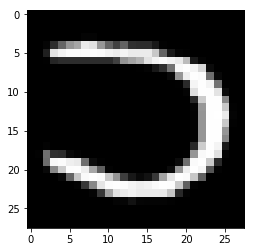

In [6]:

plt.imshow(X_train[5184].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [7]:
Y_train[5184]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(47, activation='softmax'))
        
model.summary()
        

 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dens

In [9]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])


In [10]:
model.fit(X_train,Y_train,batch_size=30,epochs=3)


Instructions for updating:
Use tf.cast instead.
Epoch 1/3
101519/101519 [==============================] - 21s 204us/step - loss: 0.5892 - acc: 0.8092
Epoch 2/3
101519/101519 [==============================] - 17s 166us/step - loss: 0.3497 - acc: 0.8732
Epoch 3/3
101519/101519 [==============================] - 16s 161us/step - loss: 0.2944 - acc: 0.8898


In [11]:
model.evaluate(X_test, Y_test, batch_size=32)


16919/16919 [==============================] - 1s 55us/step


[0.35545670337954327, 0.8734558779964056]

In [12]:
score = model.evaluate(X_test, Y_test, batch_size=32,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35545670337954327
Test accuracy: 0.8734558779964056
